# Initializing a fiber with custom spectroscopy

This short example demonstrates how you can initialize a fiber with your own absorption and emission cross section data. In practice, this example uses the same spectroscopy files for Yb germano-silicate as the demonstration classes YbDopedFiber and YbDopedDoubleCladFiber. You can find the sample files in "pyfiberamp/spectroscopies/fiber_spectra/", which will be in your Python installation's site-packages folder if you have installed PyFiberAmp. It might be easier to locate the files on the [GitHub page](https://github.com/Jomiri/pyfiberamp) instead. Your own files should follow the same format (i.e. be readable with [numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) when default parameters are used). The first column in the files should be wavelength in nanometers. The second column is the cross section in m^2. Both "," and "." are accepted as decimal separators.  

## Imports

In [1]:
from pyfiberamp.spectroscopies import Spectroscopy
from pyfiberamp.fibers import ActiveFiber, DoubleCladFiber
from pyfiberamp.parameters import YB_ABSORPTION_CS_FILE, YB_EMISSION_CS_FILE

## 1) Creating a spectroscopy object

In [2]:
path_to_absorption_cross_section_file = YB_ABSORPTION_CS_FILE # replace with your own file
path_to_emission_cross_section_file = YB_EMISSION_CS_FILE # replace with your own file
upper_state_lifetime = 1e-3
yb_spectroscopy = Spectroscopy.from_files(absorption_cross_section_file=path_to_absorption_cross_section_file,
                                            emission_cross_section_file=path_to_emission_cross_section_file,
                                            upper_state_lifetime=upper_state_lifetime,
                                            interpolate='spline') # alternatively: interpolate='linear'

## 2) Checking that the spectra and especially the interpolates look correct

Spline interpolation is smoother but does not work well with large gaps in the data. If the interpolates look bad, you can switch to linear interpolation or try to add more data points in the spectrum files. In the case of the sample cross section files, the spline interpolates the data points really well.

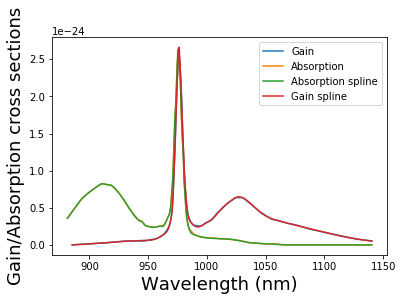

In [3]:
yb_spectroscopy.plot_gain_and_absorption_spectrum()

## 3 a) Initializing a core pumped fiber with this spectroscopy

In [4]:
fiber = ActiveFiber(spectroscopy=yb_spectroscopy,
                    ion_number_density=1e25,
                    length=1,
                    core_radius=3e-6,
                    core_na=0.10,
                    background_loss=0)

## 3 b) Initializing a double-clad fiber with this spectroscopy

In [5]:
double_clad_fiber = DoubleCladFiber(spectroscopy=yb_spectroscopy,
                    ion_number_density=1e25,
                    length=1,
                    core_radius=3e-6,
                    core_na=0.10,
                    background_loss=0,
                    ratio_of_core_and_cladding_diameters=1/10)

### The fibers are now ready for use in simulations!